In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datasetv3.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.706015,0.438560,-4.605324e-07,0.661314,0.402115,-0.020524,0.623931,0.340870,-0.030239,0.591285,...,0.764868,0.250814,-0.024172,0.749548,0.277515,-0.016900,0.740540,0.295566,-0.008772,1
1,0.704507,0.438944,-4.669741e-07,0.660355,0.401511,-0.020106,0.623078,0.339943,-0.029961,0.591305,...,0.765458,0.249390,-0.026177,0.749835,0.276569,-0.018673,0.740123,0.294928,-0.010432,1
2,0.702199,0.434401,-4.776600e-07,0.657741,0.398849,-0.020147,0.620675,0.339018,-0.030023,0.589078,...,0.763654,0.248749,-0.027281,0.748187,0.274395,-0.020270,0.738670,0.292500,-0.012493,1
3,0.701586,0.437995,-4.667893e-07,0.658710,0.401252,-0.020184,0.621680,0.341123,-0.030402,0.589073,...,0.761912,0.250555,-0.025668,0.746110,0.276449,-0.018316,0.735675,0.293193,-0.010285,1
4,0.703319,0.440537,-4.583460e-07,0.658941,0.402845,-0.020671,0.621340,0.340833,-0.030106,0.588280,...,0.762242,0.250759,-0.022561,0.747306,0.277123,-0.015642,0.736838,0.295171,-0.008099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
995,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
996,0.611445,0.301269,-4.525910e-07,0.571054,0.334101,-0.025879,0.556926,0.398270,-0.060374,0.573347,...,0.667408,0.445963,-0.090445,0.655159,0.437978,-0.076072,0.649097,0.412593,-0.065985,9
997,0.603150,0.298735,-4.317545e-07,0.563333,0.334298,-0.025933,0.550546,0.402870,-0.061945,0.567344,...,0.661341,0.439335,-0.096769,0.650611,0.428840,-0.081751,0.646074,0.402388,-0.071369,9


In [ ]:
dataset = 'datasetv3.csv'
model_save_path = 'kklite/kk.hdf5'
tflite_save_path = 'kklite/kk.tflite'

In [ ]:
NUM_CLASSES = 10

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(0, 63)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(63))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((63, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(1, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES + 1, activation='softmax')
# ])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(11, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation="softmax"))
#model.add(Activation("softmax"))

    

In [ ]:
model.summary() 

ValueError: ignored

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback,es_callback]
)

Epoch 1/1000
14/24 [================>.............] - ETA: 0s - loss: 2.5451 - accuracy: 0.0893 
Epoch 1: saving model to kklite/kk.hdf5
24/24 [==============================] - 1s 24ms/step - loss: 2.5143 - accuracy: 0.1107 - val_loss: 2.4469 - val_accuracy: 0.1680
Epoch 2/1000
15/24 [=================>............] - ETA: 0s - loss: 2.4130 - accuracy: 0.2313
Epoch 2: saving model to kklite/kk.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 2.4042 - accuracy: 0.2293 - val_loss: 2.3724 - val_accuracy: 0.2280
Epoch 3/1000
22/24 [==========================>...] - ETA: 0s - loss: 2.3390 - accuracy: 0.2756
Epoch 3: saving model to kklite/kk.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 2.3347 - accuracy: 0.2747 - val_loss: 2.3198 - val_accuracy: 0.1920
Epoch 4/1000
16/24 [===================>..........] - ETA: 0s - loss: 2.2822 - accuracy: 0.2832
Epoch 4: saving model to kklite/kk.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 2.280

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 11ms/step - loss: 0.1646 - accuracy: 0.9880


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 121ms/step
[4.0497284e-06 7.2804941e-03 9.0658709e-02 1.2069152e-01 1.0873667e-01
 4.7669198e-02 4.0359586e-03 3.7953921e-02 2.1363726e-02 5.2824748e-01
 3.3358261e-02]
9


8/8 [==============================] - 0s 3ms/step


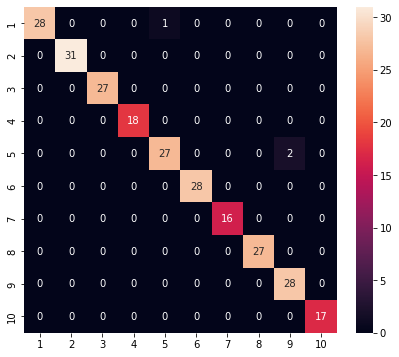

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        18
           5       0.96      0.93      0.95        29
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        27
           9       0.93      1.00      0.97        28
          10       1.00      1.00      1.00        17

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

8984

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('datasetv3.csv')
datanp = np.array(df.iloc[0].drop(df.columns[63]))
datanp= datanp.astype(np.float32)
print(datanp)
datanp = np.expand_dims(datanp, axis=0)
print(datanp)

[ 7.0601499e-01  4.3855971e-01 -4.6053245e-07  6.6131377e-01
  4.0211499e-01 -2.0523667e-02  6.2393093e-01  3.4087050e-01
 -3.0239156e-02  5.9128523e-01  2.9464206e-01 -4.0677149e-02
  5.6111294e-01  2.7013800e-01 -4.5858052e-02  6.6274422e-01
  2.8214714e-01 -3.5333121e-03  6.6253155e-01  2.3398741e-01
 -2.3204010e-02  6.6288888e-01  2.8936037e-01 -3.1944092e-02
  6.6274691e-01  3.0338448e-01 -3.6545184e-02  6.9463873e-01
  2.7935782e-01 -2.8792312e-03  6.9160098e-01  2.3330760e-01
 -2.5529623e-02  6.8472791e-01  2.9321003e-01 -2.8527291e-02
  6.8441057e-01  2.9971945e-01 -2.6557051e-02  7.2594041e-01
  2.8588638e-01 -6.9991848e-03  7.2845578e-01  2.3322150e-01
 -2.9130582e-02  7.1645182e-01  2.8470829e-01 -2.0396840e-02
  7.1258700e-01  3.0235803e-01 -9.4395876e-03  7.5554156e-01
  2.9620227e-01 -1.3413151e-02  7.6486796e-01  2.5081420e-01
 -2.4171550e-02  7.4954784e-01  2.7751541e-01 -1.6899673e-02
  7.4054021e-01  2.9556581e-01 -8.7721888e-03]
[[ 7.0601499e-01  4.3855971e-01 -4.605

In [ ]:
print(datanp)

[ 7.06014991e-01  4.38559711e-01 -4.60532448e-07  6.61313772e-01
  4.02114987e-01 -2.05236673e-02  6.23930931e-01  3.40870500e-01
 -3.02391555e-02  5.91285229e-01  2.94642061e-01 -4.06771488e-02
  5.61112940e-01  2.70137995e-01 -4.58580516e-02  6.62744224e-01
  2.82147139e-01 -3.53331212e-03  6.62531555e-01  2.33987406e-01
 -2.32040100e-02  6.62888885e-01  2.89360374e-01 -3.19440924e-02
  6.62746906e-01  3.03384483e-01 -3.65451835e-02  6.94638729e-01
  2.79357821e-01 -2.87923124e-03  6.91600978e-01  2.33307600e-01
 -2.55296230e-02  6.84727907e-01  2.93210030e-01 -2.85272915e-02
  6.84410572e-01  2.99719453e-01 -2.65570506e-02  7.25940406e-01
  2.85886377e-01 -6.99918484e-03  7.28455782e-01  2.33221501e-01
 -2.91305818e-02  7.16451824e-01  2.84708291e-01 -2.03968398e-02
  7.12586999e-01  3.02358031e-01 -9.43958759e-03  7.55541563e-01
  2.96202272e-01 -1.34131508e-02  7.64867961e-01  2.50814199e-01
 -2.41715498e-02  7.49547839e-01  2.77515411e-01 -1.68996733e-02
  7.40540206e-01  2.95565

In [ ]:
print(datanp)

[ 7.06014991e-01  4.38559711e-01 -4.60532448e-07  6.61313772e-01
  4.02114987e-01 -2.05236673e-02  6.23930931e-01  3.40870500e-01
 -3.02391555e-02  5.91285229e-01  2.94642061e-01 -4.06771488e-02
  5.61112940e-01  2.70137995e-01 -4.58580516e-02  6.62744224e-01
  2.82147139e-01 -3.53331212e-03  6.62531555e-01  2.33987406e-01
 -2.32040100e-02  6.62888885e-01  2.89360374e-01 -3.19440924e-02
  6.62746906e-01  3.03384483e-01 -3.65451835e-02  6.94638729e-01
  2.79357821e-01 -2.87923124e-03  6.91600978e-01  2.33307600e-01
 -2.55296230e-02  6.84727907e-01  2.93210030e-01 -2.85272915e-02
  6.84410572e-01  2.99719453e-01 -2.65570506e-02  7.25940406e-01
  2.85886377e-01 -6.99918484e-03  7.28455782e-01  2.33221501e-01
 -2.91305818e-02  7.16451824e-01  2.84708291e-01 -2.03968398e-02
  7.12586999e-01  3.02358031e-01 -9.43958759e-03  7.55541563e-01
  2.96202272e-01 -1.34131508e-02  7.64867961e-01  2.50814199e-01
 -2.41715498e-02  7.49547839e-01  2.77515411e-01 -1.68996733e-02
  7.40540206e-01  2.95565

In [ ]:
!pip install tflite-runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="kk.tflite")
interpreter.allocate_tensors()


In [ ]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
print(input_details[0])

{'name': 'serving_default_dense_15_input:0', 'index': 0, 'shape': array([ 1, 63], dtype=int32), 'shape_signature': array([-1, 63], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [ ]:
interpreter.set_tensor(input_details[0]['index'],datanp)


In [ ]:
print(interpreter.get_input_details())

[{'name': 'serving_default_dense_15_input:0', 'index': 0, 'shape': array([ 1, 63], dtype=int32), 'shape_signature': array([-1, 63], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 120 µs, sys: 0 ns, total: 120 µs
Wall time: 126 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.4407561e-07 9.3596512e-01 9.7655947e-04 3.7298370e-03 7.4920419e-05
 4.8910826e-02 5.8699452e-04 4.0460862e-03 1.6891757e-04 1.8126039e-03
 3.7279022e-03]
1
